<a href="https://colab.research.google.com/github/harshyadav1604/Dynamic_Pricing_for_Urban_Parking_Slot/blob/main/parking_Dynamic_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
# Replace this path if you're working in Google Colab
file_path = "/content/dataset.csv"

# Load the data
df = pd.read_csv(file_path)


In [ ]:
df.head()

ID SystemCodeNumber  Capacity   Latitude  Longitude  Occupancy VehicleType  \
0   0      BHMBCCMKT01       577  26.144536  91.736172         61         car   
1   1      BHMBCCMKT01       577  26.144536  91.736172         64         car   
2   2      BHMBCCMKT01       577  26.144536  91.736172         80         car   
3   3      BHMBCCMKT01       577  26.144536  91.736172        107         car   
4   4      BHMBCCMKT01       577  26.144536  91.736172        150        bike   

  TrafficConditionNearby  QueueLength  IsSpecialDay LastUpdatedDate  \
0                    low            1             0      04-10-2016   
1                    low            1             0      04-10-2016   
2                    low            2             0      04-10-2016   
3                    low            2             0      04-10-2016   
4                    low            2             0      04-10-2016   

  LastUpdatedTime  
0        07:59:00  
1        08:25:00  
2        08:59:00  
3        09:32:00  
4        09:59:00

In [ ]:
df = df.rename(columns={
    'timestamp': 'timestamp',
    'parking_lot_id': 'parking_lot_id',
    'Occupancy': 'occupancy',
    'Capacity': 'capacity',
    'QueueLength': 'queue_length',
    'traffic_level': 'traffic_level',
    'IsSpecialDay': 'special_day',
    'vehicle_weight': 'vehicle_weight'
})


df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


df = df.rename(columns={"is_special_day": "special_day"})

In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18368 entries, 0 to 18367
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      18368 non-null  int64  
 1   systemcodenumber        18368 non-null  object 
 2   capacity                18368 non-null  int64  
 3   latitude                18368 non-null  float64
 4   longitude               18368 non-null  float64
 5   occupancy               18368 non-null  int64  
 6   vehicletype             18368 non-null  object 
 7   trafficconditionnearby  18368 non-null  object 
 8   queue_length            18368 non-null  int64  
 9   special_day             18368 non-null  int64  
 10  lastupdateddate         18368 non-null  object 
 11  lastupdatedtime         18368 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1.7+ MB


id                        0
systemcodenumber          0
capacity                  0
latitude                  0
longitude                 0
occupancy                 0
vehicletype               0
trafficconditionnearby    0
queue_length              0
special_day               0
lastupdateddate           0
lastupdatedtime           0
dtype: int64

In [ ]:
for col in df.columns:
    print(f"{col}:", df[col].unique())

id: [    0     1     2 ... 18365 18366 18367]
systemcodenumber: ['BHMBCCMKT01' 'BHMBCCTHL01' 'BHMEURBRD01' 'BHMMBMMBX01' 'BHMNCPHST01'
 'BHMNCPNST01' 'Broad Street' 'Others-CCCPS105a' 'Others-CCCPS119a'
 'Others-CCCPS135a' 'Others-CCCPS202' 'Others-CCCPS8' 'Others-CCCPS98'
 'Shopping']
capacity: [ 577  387  470  687 1200  485  690 2009 2803 3883 2937 1322 3103 1920]
latitude: [26.14453614 26.14449459 26.14901995 20.0000347  26.14001386 26.14004753
 26.13795775 26.14747299 26.14754061 26.14749943 26.14749053 26.14754886
 26.14749998 26.15050395]
longitude: [91.73617216 91.73620513 91.7395035  78.00000286 91.73099967 91.73097233
 91.74099445 91.72804914 91.72797041 91.72800489 91.72799688 91.72799519
 91.72797778 91.73353109]
occupancy: [  61   64   80 ... 1463 1510 1487]
vehicletype: ['car' 'bike' 'truck' 'cycle']
trafficconditionnearby: ['low' 'high' 'average']
queue_length: [ 1  2  3  6  5  8  7  4  9 10  0 11 12 13 14 15]
special_day: [0 1]
lastupdateddate: ['04-10-2016' '05-10-2016'

In [ ]:
df['systemcodenumber'].unique()

array(['BHMBCCMKT01', 'BHMBCCTHL01', 'BHMEURBRD01', 'BHMMBMMBX01',
       'BHMNCPHST01', 'BHMNCPNST01', 'Broad Street', 'Others-CCCPS105a',
       'Others-CCCPS119a', 'Others-CCCPS135a', 'Others-CCCPS202',
       'Others-CCCPS8', 'Others-CCCPS98', 'Shopping'], dtype=object)

In [ ]:
locations = ['BHMBCCMKT01', 'BHMNCPHST01', 'BHMMBMMBX01', 'BHMNCPNST01',
             'Shopping', 'BHMEURBRD01', 'Broad Street', 'Others-CCCPS8',
             'Others-CCCPS105a', 'Others-CCCPS119a', 'BHMBCCTHL01',
             'Others-CCCPS135a', 'Others-CCCPS202', 'Others-CCCPS98']

# Create mapping
location_mapping = {loc: idx+1 for idx, loc in enumerate(locations)}

# Apply mapping to the column
df['parking_lot_id'] = df['systemcodenumber'].map(location_mapping)

In [ ]:
df['timestamp'] = pd.to_datetime(df['lastupdateddate'] + ' ' + df['lastupdatedtime'],
                                  format='%d-%m-%Y %H:%M:%S')

df = df.sort_values(by=['timestamp', 'parking_lot_id'])

In [ ]:
df

id  systemcodenumber  capacity   latitude  longitude  occupancy  \
0          0       BHMBCCMKT01       577  26.144536  91.736172         61   
5248    5248       BHMNCPHST01      1200  26.140014  91.731000        237   
3936    3936       BHMMBMMBX01       687  20.000035  78.000003        264   
6560    6560       BHMNCPNST01       485  26.140048  91.730972        249   
17056  17056          Shopping      1920  26.150504  91.733531        614   
...      ...               ...       ...        ...        ...        ...   
11807  11807  Others-CCCPS119a      2803  26.147541  91.727970       1262   
2623    2623       BHMBCCTHL01       387  26.144495  91.736205        387   
13119  13119  Others-CCCPS135a      3883  26.147499  91.728005       2533   
14431  14431   Others-CCCPS202      2937  26.147491  91.727997       1184   
17055  17055    Others-CCCPS98      3103  26.147500  91.727978       1671   

      vehicletype trafficconditionnearby  queue_length  special_day  \
0             car                    low             1            0   
5248         bike                    low             2            0   
3936          car                    low             2            0   
6560          car                    low             2            0   
17056       cycle                    low             2            0   
...           ...                    ...           ...          ...   
11807        bike                    low             2            0   
2623          car                    low             2            0   
13119         car                    low             3            0   
14431         car                    low             2            0   
17055         car                    low             3            0   

      lastupdateddate lastupdatedtime  parking_lot_id           timestamp  
0          04-10-2016        07:59:00               1 2016-10-04 07:59:00  
5248       04-10-2016        07:59:00               2 2016-10-04 07:59:00  
3936       04-10-2016        07:59:00               3 2016-10-04 07:59:00  
6560       04-10-2016        07:59:00               4 2016-10-04 07:59:00  
17056      04-10-2016        07:59:00               5 2016-10-04 07:59:00  
...               ...             ...             ...                 ...  
11807      19-12-2016        16:30:00              10 2016-12-19 16:30:00  
2623       19-12-2016        16:30:00              11 2016-12-19 16:30:00  
13119      19-12-2016        16:30:00              12 2016-12-19 16:30:00  
14431      19-12-2016        16:30:00              13 2016-12-19 16:30:00  
17055      19-12-2016        16:30:00              14 2016-12-19 16:30:00  

[18368 rows x 14 columns]

In [ ]:
vehicle_weights = {
    'car': 1.0,
    'bike': 0.5,
    'truck': 1.5
}

df['vehicle_weight'] = df['vehicletype'].map(vehicle_weights)


In [ ]:
df

id  systemcodenumber  capacity   latitude  longitude  occupancy  \
0          0       BHMBCCMKT01       577  26.144536  91.736172         61   
5248    5248       BHMNCPHST01      1200  26.140014  91.731000        237   
3936    3936       BHMMBMMBX01       687  20.000035  78.000003        264   
6560    6560       BHMNCPNST01       485  26.140048  91.730972        249   
17056  17056          Shopping      1920  26.150504  91.733531        614   
...      ...               ...       ...        ...        ...        ...   
11807  11807  Others-CCCPS119a      2803  26.147541  91.727970       1262   
2623    2623       BHMBCCTHL01       387  26.144495  91.736205        387   
13119  13119  Others-CCCPS135a      3883  26.147499  91.728005       2533   
14431  14431   Others-CCCPS202      2937  26.147491  91.727997       1184   
17055  17055    Others-CCCPS98      3103  26.147500  91.727978       1671   

      vehicletype trafficconditionnearby  queue_length  special_day  \
0             car                    low             1            0   
5248         bike                    low             2            0   
3936          car                    low             2            0   
6560          car                    low             2            0   
17056       cycle                    low             2            0   
...           ...                    ...           ...          ...   
11807        bike                    low             2            0   
2623          car                    low             2            0   
13119         car                    low             3            0   
14431         car                    low             2            0   
17055         car                    low             3            0   

      lastupdateddate lastupdatedtime  parking_lot_id           timestamp  \
0          04-10-2016        07:59:00               1 2016-10-04 07:59:00   
5248       04-10-2016        07:59:00               2 2016-10-04 07:59:00   
3936       04-10-2016        07:59:00               3 2016-10-04 07:59:00   
6560       04-10-2016        07:59:00               4 2016-10-04 07:59:00   
17056      04-10-2016        07:59:00               5 2016-10-04 07:59:00   
...               ...             ...             ...                 ...   
11807      19-12-2016        16:30:00              10 2016-12-19 16:30:00   
2623       19-12-2016        16:30:00              11 2016-12-19 16:30:00   
13119      19-12-2016        16:30:00              12 2016-12-19 16:30:00   
14431      19-12-2016        16:30:00              13 2016-12-19 16:30:00   
17055      19-12-2016        16:30:00              14 2016-12-19 16:30:00   

       vehicle_weight  
0                 1.0  
5248              0.5  
3936              1.0  
6560              1.0  
17056             NaN  
...               ...  
11807             0.5  
2623              1.0  
13119             1.0  
14431             1.0  
17055             1.0  

[18368 rows x 15 columns]

In [ ]:
df

id  systemcodenumber  capacity   latitude  longitude  occupancy  \
0          0       BHMBCCMKT01       577  26.144536  91.736172         61   
5248    5248       BHMNCPHST01      1200  26.140014  91.731000        237   
3936    3936       BHMMBMMBX01       687  20.000035  78.000003        264   
6560    6560       BHMNCPNST01       485  26.140048  91.730972        249   
17056  17056          Shopping      1920  26.150504  91.733531        614   
...      ...               ...       ...        ...        ...        ...   
11807  11807  Others-CCCPS119a      2803  26.147541  91.727970       1262   
2623    2623       BHMBCCTHL01       387  26.144495  91.736205        387   
13119  13119  Others-CCCPS135a      3883  26.147499  91.728005       2533   
14431  14431   Others-CCCPS202      2937  26.147491  91.727997       1184   
17055  17055    Others-CCCPS98      3103  26.147500  91.727978       1671   

      vehicletype trafficconditionnearby  queue_length  special_day  \
0             car                    low             1            0   
5248         bike                    low             2            0   
3936          car                    low             2            0   
6560          car                    low             2            0   
17056       cycle                    low             2            0   
...           ...                    ...           ...          ...   
11807        bike                    low             2            0   
2623          car                    low             2            0   
13119         car                    low             3            0   
14431         car                    low             2            0   
17055         car                    low             3            0   

      lastupdateddate lastupdatedtime  parking_lot_id           timestamp  \
0          04-10-2016        07:59:00               1 2016-10-04 07:59:00   
5248       04-10-2016        07:59:00               2 2016-10-04 07:59:00   
3936       04-10-2016        07:59:00               3 2016-10-04 07:59:00   
6560       04-10-2016        07:59:00               4 2016-10-04 07:59:00   
17056      04-10-2016        07:59:00               5 2016-10-04 07:59:00   
...               ...             ...             ...                 ...   
11807      19-12-2016        16:30:00              10 2016-12-19 16:30:00   
2623       19-12-2016        16:30:00              11 2016-12-19 16:30:00   
13119      19-12-2016        16:30:00              12 2016-12-19 16:30:00   
14431      19-12-2016        16:30:00              13 2016-12-19 16:30:00   
17055      19-12-2016        16:30:00              14 2016-12-19 16:30:00   

       vehicle_weight  
0                 1.0  
5248              0.5  
3936              1.0  
6560              1.0  
17056             NaN  
...               ...  
11807             0.5  
2623              1.0  
13119             1.0  
14431             1.0  
17055             1.0  

[18368 rows x 15 columns]

In [ ]:
traffic_mapping = {'low': 1, 'average': 2, 'high': 3}

df['traffic_level'] = df['trafficconditionnearby'].map(traffic_mapping)

In [ ]:
df['occupancy_rate'] = df['occupancy'] / df['capacity']

# Normalize queue length and traffic using min-max scaling
df['queue_norm'] = (df['queue_length'] - df['queue_length'].min()) / (df['queue_length'].max() - df['queue_length'].min())
df['traffic_norm'] = (df['traffic_level'] - df['traffic_level'].min()) / (df['traffic_level'].max() - df['traffic_level'].min())


In [ ]:
df

id  systemcodenumber  capacity   latitude  longitude  occupancy  \
0          0       BHMBCCMKT01       577  26.144536  91.736172         61   
5248    5248       BHMNCPHST01      1200  26.140014  91.731000        237   
3936    3936       BHMMBMMBX01       687  20.000035  78.000003        264   
6560    6560       BHMNCPNST01       485  26.140048  91.730972        249   
17056  17056          Shopping      1920  26.150504  91.733531        614   
...      ...               ...       ...        ...        ...        ...   
11807  11807  Others-CCCPS119a      2803  26.147541  91.727970       1262   
2623    2623       BHMBCCTHL01       387  26.144495  91.736205        387   
13119  13119  Others-CCCPS135a      3883  26.147499  91.728005       2533   
14431  14431   Others-CCCPS202      2937  26.147491  91.727997       1184   
17055  17055    Others-CCCPS98      3103  26.147500  91.727978       1671   

      vehicletype trafficconditionnearby  queue_length  special_day  \
0             car                    low             1            0   
5248         bike                    low             2            0   
3936          car                    low             2            0   
6560          car                    low             2            0   
17056       cycle                    low             2            0   
...           ...                    ...           ...          ...   
11807        bike                    low             2            0   
2623          car                    low             2            0   
13119         car                    low             3            0   
14431         car                    low             2            0   
17055         car                    low             3            0   

      lastupdateddate lastupdatedtime  parking_lot_id           timestamp  \
0          04-10-2016        07:59:00               1 2016-10-04 07:59:00   
5248       04-10-2016        07:59:00               2 2016-10-04 07:59:00   
3936       04-10-2016        07:59:00               3 2016-10-04 07:59:00   
6560       04-10-2016        07:59:00               4 2016-10-04 07:59:00   
17056      04-10-2016        07:59:00               5 2016-10-04 07:59:00   
...               ...             ...             ...                 ...   
11807      19-12-2016        16:30:00              10 2016-12-19 16:30:00   
2623       19-12-2016        16:30:00              11 2016-12-19 16:30:00   
13119      19-12-2016        16:30:00              12 2016-12-19 16:30:00   
14431      19-12-2016        16:30:00              13 2016-12-19 16:30:00   
17055      19-12-2016        16:30:00              14 2016-12-19 16:30:00   

       vehicle_weight  traffic_level  occupancy_rate  queue_norm  traffic_norm  
0                 1.0              1        0.105719    0.066667           0.0  
5248              0.5              1        0.197500    0.133333           0.0  
3936              1.0              1        0.384279    0.133333           0.0  
6560              1.0              1        0.513402    0.133333           0.0  
17056             NaN              1        0.319792    0.133333           0.0  
...               ...            ...             ...         ...           ...  
11807             0.5              1        0.450232    0.133333           0.0  
2623              1.0              1        1.000000    0.133333           0.0  
13119             1.0              1        0.652331    0.200000           0.0  
14431             1.0              1        0.403132    0.133333           0.0  
17055             1.0              1        0.538511    0.200000           0.0  

[18368 rows x 19 columns]

In [ ]:
df['price'] = 10.0  # Base price $10

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18368 entries, 0 to 17055
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      18368 non-null  int64         
 1   systemcodenumber        18368 non-null  object        
 2   capacity                18368 non-null  int64         
 3   latitude                18368 non-null  float64       
 4   longitude               18368 non-null  float64       
 5   occupancy               18368 non-null  int64         
 6   vehicletype             18368 non-null  object        
 7   trafficconditionnearby  18368 non-null  object        
 8   queue_length            18368 non-null  int64         
 9   special_day             18368 non-null  int64         
 10  lastupdateddate         18368 non-null  object        
 11  lastupdatedtime         18368 non-null  object        
 12  parking_lot_id          18368 non-null  int64      

In [ ]:
df

id  systemcodenumber  capacity   latitude  longitude  occupancy  \
0          0       BHMBCCMKT01       577  26.144536  91.736172         61   
5248    5248       BHMNCPHST01      1200  26.140014  91.731000        237   
3936    3936       BHMMBMMBX01       687  20.000035  78.000003        264   
6560    6560       BHMNCPNST01       485  26.140048  91.730972        249   
17056  17056          Shopping      1920  26.150504  91.733531        614   
...      ...               ...       ...        ...        ...        ...   
11807  11807  Others-CCCPS119a      2803  26.147541  91.727970       1262   
2623    2623       BHMBCCTHL01       387  26.144495  91.736205        387   
13119  13119  Others-CCCPS135a      3883  26.147499  91.728005       2533   
14431  14431   Others-CCCPS202      2937  26.147491  91.727997       1184   
17055  17055    Others-CCCPS98      3103  26.147500  91.727978       1671   

      vehicletype trafficconditionnearby  queue_length  special_day  \
0             car                    low             1            0   
5248         bike                    low             2            0   
3936          car                    low             2            0   
6560          car                    low             2            0   
17056       cycle                    low             2            0   
...           ...                    ...           ...          ...   
11807        bike                    low             2            0   
2623          car                    low             2            0   
13119         car                    low             3            0   
14431         car                    low             2            0   
17055         car                    low             3            0   

      lastupdateddate lastupdatedtime  parking_lot_id           timestamp  \
0          04-10-2016        07:59:00               1 2016-10-04 07:59:00   
5248       04-10-2016        07:59:00               2 2016-10-04 07:59:00   
3936       04-10-2016        07:59:00               3 2016-10-04 07:59:00   
6560       04-10-2016        07:59:00               4 2016-10-04 07:59:00   
17056      04-10-2016        07:59:00               5 2016-10-04 07:59:00   
...               ...             ...             ...                 ...   
11807      19-12-2016        16:30:00              10 2016-12-19 16:30:00   
2623       19-12-2016        16:30:00              11 2016-12-19 16:30:00   
13119      19-12-2016        16:30:00              12 2016-12-19 16:30:00   
14431      19-12-2016        16:30:00              13 2016-12-19 16:30:00   
17055      19-12-2016        16:30:00              14 2016-12-19 16:30:00   

       vehicle_weight  traffic_level  occupancy_rate  queue_norm  \
0                 1.0              1        0.105719    0.066667   
5248              0.5              1        0.197500    0.133333   
3936              1.0              1        0.384279    0.133333   
6560              1.0              1        0.513402    0.133333   
17056             NaN              1        0.319792    0.133333   
...               ...            ...             ...         ...   
11807             0.5              1        0.450232    0.133333   
2623              1.0              1        1.000000    0.133333   
13119             1.0              1        0.652331    0.200000   
14431             1.0              1        0.403132    0.133333   
17055             1.0              1        0.538511    0.200000   

       traffic_norm  price  
0               0.0   10.0  
5248            0.0   10.0  
3936            0.0   10.0  
6560            0.0   10.0  
17056           0.0   10.0  
...             ...    ...  
11807           0.0   10.0  
2623            0.0   10.0  
13119           0.0   10.0  
14431           0.0   10.0  
17055           0.0   10.0  

[18368 rows x 20 columns]

In [ ]:
df = df.sort_values(by=['timestamp', 'parking_lot_id'])  # Only if those columns exist

In [ ]:
df.head()

id systemcodenumber  capacity   latitude  longitude  occupancy  \
0          0      BHMBCCMKT01       577  26.144536  91.736172         61   
5248    5248      BHMNCPHST01      1200  26.140014  91.731000        237   
3936    3936      BHMMBMMBX01       687  20.000035  78.000003        264   
6560    6560      BHMNCPNST01       485  26.140048  91.730972        249   
17056  17056         Shopping      1920  26.150504  91.733531        614   

      vehicletype trafficconditionnearby  queue_length  special_day  \
0             car                    low             1            0   
5248         bike                    low             2            0   
3936          car                    low             2            0   
6560          car                    low             2            0   
17056       cycle                    low             2            0   

      lastupdateddate lastupdatedtime  parking_lot_id           timestamp  \
0          04-10-2016        07:59:00               1 2016-10-04 07:59:00   
5248       04-10-2016        07:59:00               2 2016-10-04 07:59:00   
3936       04-10-2016        07:59:00               3 2016-10-04 07:59:00   
6560       04-10-2016        07:59:00               4 2016-10-04 07:59:00   
17056      04-10-2016        07:59:00               5 2016-10-04 07:59:00   

       vehicle_weight  traffic_level  occupancy_rate  queue_norm  \
0                 1.0              1        0.105719    0.066667   
5248              0.5              1        0.197500    0.133333   
3936              1.0              1        0.384279    0.133333   
6560              1.0              1        0.513402    0.133333   
17056             NaN              1        0.319792    0.133333   

       traffic_norm  price  
0               0.0   10.0  
5248            0.0   10.0  
3936            0.0   10.0  
6560            0.0   10.0  
17056           0.0   10.0

In [ ]:
# Alpha controls how sensitive price is to occupancy
alpha = 2.0
base_price = 10.0
min_price = 5.0
max_price = 20.0


In [ ]:
df['price_model1'] = base_price

In [ ]:

df = df.sort_values(by=['parking_lot_id', 'timestamp'])
for lot_id, group in df.groupby('parking_lot_id'):
    previous_price = base_price
    price_list = []

    for idx, row in group.iterrows():
        occ_rate = row['occupancy'] / row['capacity']

        new_price = previous_price + alpha * occ_rate

        new_price = min(max(new_price, min_price), max_price)

        price_list.append(new_price)
        previous_price = new_price

    df.loc[group.index, 'price_model1'] = price_list


In [ ]:
df

id systemcodenumber  capacity   latitude  longitude  occupancy  \
0          0      BHMBCCMKT01       577  26.144536  91.736172         61   
1          1      BHMBCCMKT01       577  26.144536  91.736172         64   
2          2      BHMBCCMKT01       577  26.144536  91.736172         80   
3          3      BHMBCCMKT01       577  26.144536  91.736172        107   
4          4      BHMBCCMKT01       577  26.144536  91.736172        150   
...      ...              ...       ...        ...        ...        ...   
17051  17051   Others-CCCPS98      3103  26.147500  91.727978       1840   
17052  17052   Others-CCCPS98      3103  26.147500  91.727978       1820   
17053  17053   Others-CCCPS98      3103  26.147500  91.727978       1781   
17054  17054   Others-CCCPS98      3103  26.147500  91.727978       1718   
17055  17055   Others-CCCPS98      3103  26.147500  91.727978       1671   

      vehicletype trafficconditionnearby  queue_length  special_day  ...  \
0             car                    low             1            0  ...   
1             car                    low             1            0  ...   
2             car                    low             2            0  ...   
3             car                    low             2            0  ...   
4            bike                    low             2            0  ...   
...           ...                    ...           ...          ...  ...   
17051         car                average             5            0  ...   
17052         car                    low             4            0  ...   
17053         car                    low             3            0  ...   
17054         car                    low             3            0  ...   
17055         car                    low             3            0  ...   

      lastupdatedtime parking_lot_id           timestamp vehicle_weight  \
0            07:59:00              1 2016-10-04 07:59:00            1.0   
1            08:25:00              1 2016-10-04 08:25:00            1.0   
2            08:59:00              1 2016-10-04 08:59:00            1.0   
3            09:32:00              1 2016-10-04 09:32:00            1.0   
4            09:59:00              1 2016-10-04 09:59:00            0.5   
...               ...            ...                 ...            ...   
17051        14:30:00             14 2016-12-19 14:30:00            1.0   
17052        15:03:00             14 2016-12-19 15:03:00            1.0   
17053        15:29:00             14 2016-12-19 15:29:00            1.0   
17054        16:03:00             14 2016-12-19 16:03:00            1.0   
17055        16:30:00             14 2016-12-19 16:30:00            1.0   

       traffic_level  occupancy_rate  queue_norm  traffic_norm  price  \
0                  1        0.105719    0.066667           0.0   10.0   
1                  1        0.110919    0.066667           0.0   10.0   
2                  1        0.138648    0.133333           0.0   10.0   
3                  1        0.185442    0.133333           0.0   10.0   
4                  1        0.259965    0.133333           0.0   10.0   
...              ...             ...         ...           ...    ...   
17051              2        0.592975    0.333333           0.5   10.0   
17052              1        0.586529    0.266667           0.0   10.0   
17053              1        0.573961    0.200000           0.0   10.0   
17054              1        0.553658    0.200000           0.0   10.0   
17055              1        0.538511    0.200000           0.0   10.0   

       price_model1  
0         10.211438  
1         10.433276  
2         10.710572  
3         11.081456  
4         11.601386  
...             ...  
17051     20.000000  
17052     20.000000  
17053     20.000000  
17054     20.000000  
17055     20.000000  

[18368 rows x 21 columns]

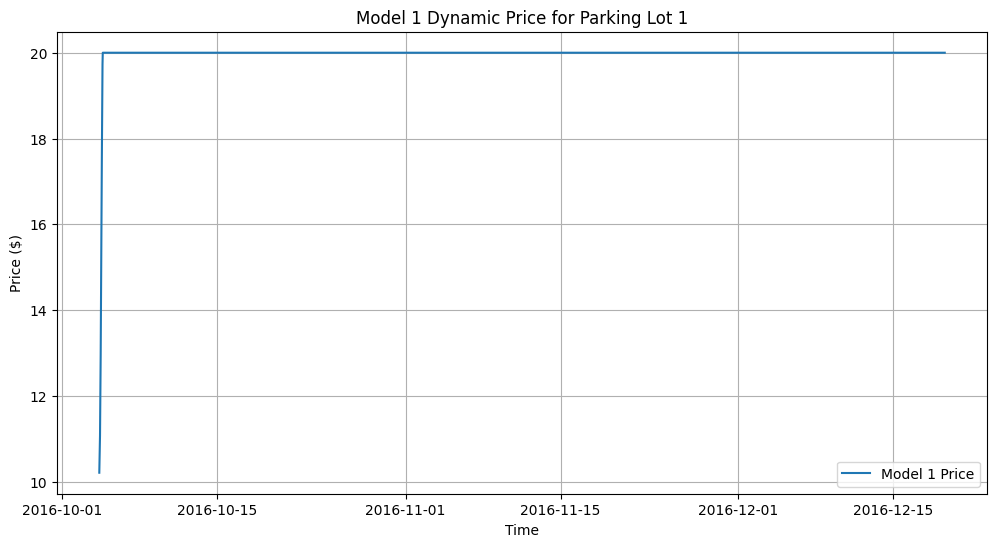

In [ ]:
import matplotlib.pyplot as plt

lot_id = df['parking_lot_id'].unique()[0]  # Pick one lot to visualize
plot_df = df[df['parking_lot_id'] == lot_id]

plt.figure(figsize=(12, 6))
plt.plot(plot_df['timestamp'], plot_df['price_model1'], label='Model 1 Price')
plt.title(f"Model 1 Dynamic Price for Parking Lot {lot_id}")
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# Coefficients (tune later based on results)
alpha = 0.5     # occupancy weight
beta = 0.3      # queue weight
gamma = 0.2     # traffic weight
delta = 0.4     # special day weight
epsilon = 0.3   # vehicle type weight

lambda_ = 0.5   # how strongly demand impacts price

base_price = 10.0
min_price = 5.0
max_price = 20.0


In [ ]:
df['raw_demand'] = (
    alpha * df['occupancy_rate'] +
    beta * df['queue_norm'] -
    gamma * df['traffic_norm'] +
    delta * df['special_day'] +
    epsilon * df['vehicle_weight']
)

In [ ]:
d_min = df['raw_demand'].min()
d_max = df['raw_demand'].max()

df['norm_demand'] = (df['raw_demand'] - d_min) / (d_max - d_min)


In [ ]:
df['price_model2'] = base_price * (1 + lambda_ * df['norm_demand'])

# Clamp price to [min_price, max_price]
df['price_model2'] = df['price_model2'].clip(lower=min_price, upper=max_price)


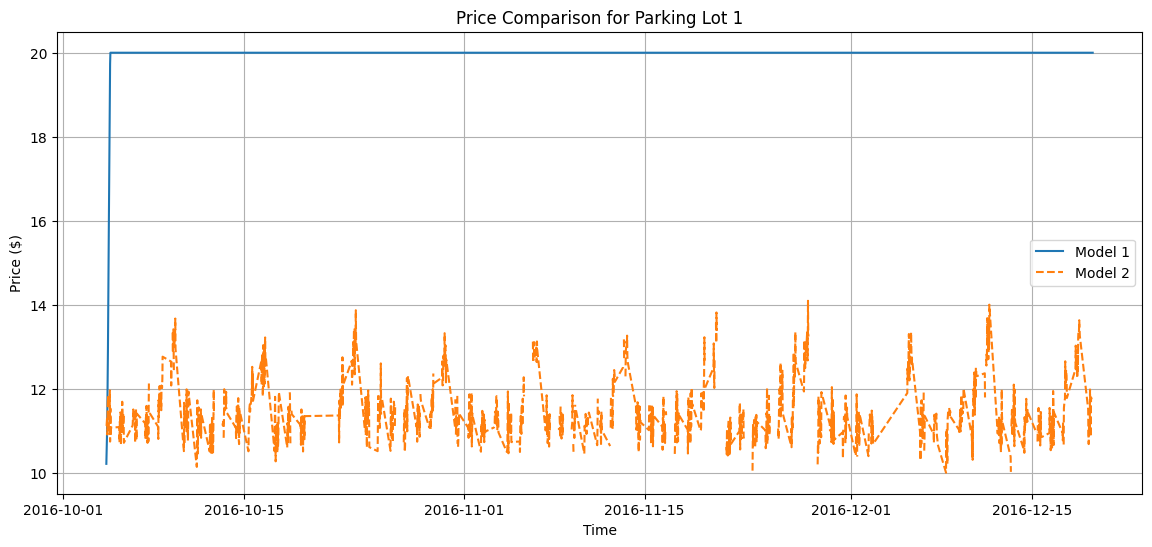

In [ ]:
lot_id = df['parking_lot_id'].unique()[0]  # Any one lot
plot_df = df[df['parking_lot_id'] == lot_id]

plt.figure(figsize=(14, 6))
plt.plot(plot_df['timestamp'], plot_df['price_model1'], label='Model 1')
plt.plot(plot_df['timestamp'], plot_df['price_model2'], label='Model 2', linestyle='--')
plt.title(f"Price Comparison for Parking Lot {lot_id}")
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):
    # convert to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    # apply formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Earth radius in km
    return c * r


In [ ]:
df

id systemcodenumber  capacity   latitude  longitude  occupancy  \
0          0      BHMBCCMKT01       577  26.144536  91.736172         61   
1          1      BHMBCCMKT01       577  26.144536  91.736172         64   
2          2      BHMBCCMKT01       577  26.144536  91.736172         80   
3          3      BHMBCCMKT01       577  26.144536  91.736172        107   
4          4      BHMBCCMKT01       577  26.144536  91.736172        150   
...      ...              ...       ...        ...        ...        ...   
17051  17051   Others-CCCPS98      3103  26.147500  91.727978       1840   
17052  17052   Others-CCCPS98      3103  26.147500  91.727978       1820   
17053  17053   Others-CCCPS98      3103  26.147500  91.727978       1781   
17054  17054   Others-CCCPS98      3103  26.147500  91.727978       1718   
17055  17055   Others-CCCPS98      3103  26.147500  91.727978       1671   

      vehicletype trafficconditionnearby  queue_length  special_day  ...  \
0             car                    low             1            0  ...   
1             car                    low             1            0  ...   
2             car                    low             2            0  ...   
3             car                    low             2            0  ...   
4            bike                    low             2            0  ...   
...           ...                    ...           ...          ...  ...   
17051         car                average             5            0  ...   
17052         car                    low             4            0  ...   
17053         car                    low             3            0  ...   
17054         car                    low             3            0  ...   
17055         car                    low             3            0  ...   

      vehicle_weight traffic_level  occupancy_rate queue_norm  traffic_norm  \
0                1.0             1        0.105719   0.066667           0.0   
1                1.0             1        0.110919   0.066667           0.0   
2                1.0             1        0.138648   0.133333           0.0   
3                1.0             1        0.185442   0.133333           0.0   
4                0.5             1        0.259965   0.133333           0.0   
...              ...           ...             ...        ...           ...   
17051            1.0             2        0.592975   0.333333           0.5   
17052            1.0             1        0.586529   0.266667           0.0   
17053            1.0             1        0.573961   0.200000           0.0   
17054            1.0             1        0.553658   0.200000           0.0   
17055            1.0             1        0.538511   0.200000           0.0   

       price  price_model1  raw_demand  norm_demand  price_model2  
0       10.0     10.211438    0.372860     0.221834     11.109168  
1       10.0     10.433276    0.375459     0.223817     11.119086  
2       10.0     10.710572    0.409324     0.249657     11.248285  
3       10.0     11.081456    0.432721     0.267510     11.337548  
4       10.0     11.601386    0.319983     0.181487     10.907435  
...      ...           ...         ...          ...           ...  
17051   10.0     20.000000    0.596487     0.392468     11.962339  
17052   10.0     20.000000    0.673265     0.451051     12.255256  
17053   10.0     20.000000    0.646980     0.430996     12.154978  
17054   10.0     20.000000    0.636829     0.423250     12.116248  
17055   10.0     20.000000    0.629256     0.417471     12.087355  

[18368 rows x 24 columns]

In [ ]:
# Get unique lot info
lot_locations = df[['parking_lot_id', 'latitude', 'longitude']].drop_duplicates()

# Build neighbor map for each lot
proximity_map = {}

threshold_km = 0.5  # Lots within 500 meters

for idx, row1 in lot_locations.iterrows():
    neighbors = []
    for jdx, row2 in lot_locations.iterrows():
        if row1['parking_lot_id'] != row2['parking_lot_id']:
            dist = haversine(row1['latitude'], row1['longitude'], row2['latitude'], row2['longitude'])
            if dist <= threshold_km:
                neighbors.append(row2['parking_lot_id'])
    proximity_map[row1['parking_lot_id']] = neighbors


In [ ]:
df['price_model3'] = df['price_model2']  # Start from demand-based price

# Simulate time progression
df = df.sort_values(by=['parking_lot_id', 'timestamp'])

# Apply adjustments
for timestamp in df['timestamp'].unique():
    current_frame = df[df['timestamp'] == timestamp]

    for lot_id in current_frame['parking_lot_id'].unique():
        this_row = current_frame[current_frame['parking_lot_id'] == lot_id].iloc[0]
        this_price = this_row['price_model2']
        this_occupancy = this_row['occupancy']
        this_capacity = this_row['capacity']
        occ_rate = this_occupancy / this_capacity

        neighbors = proximity_map.get(lot_id, [])
        if not neighbors:
            continue

        # Find average price of neighbors
        neighbor_prices = []
        for n_id in neighbors:
            match = current_frame[current_frame['parking_lot_id'] == n_id]
            if not match.empty:
                neighbor_prices.append(match.iloc[0]['price_model2'])

        if not neighbor_prices:
            continue

        avg_neighbor_price = np.mean(neighbor_prices)

        # Adjust price based on competition
        if occ_rate >= 1.0 and this_price > avg_neighbor_price:
            # Too full, and you're expensive → lower price
            new_price = max(this_price - 1.0, 5.0)
        elif this_price < avg_neighbor_price:
            # You're cheaper → can slightly raise price
            new_price = min(this_price + 0.5, 20.0)
        else:
            new_price = this_price  # No change

        df.loc[(df['timestamp'] == timestamp) & (df['parking_lot_id'] == lot_id), 'price_model3'] = new_price


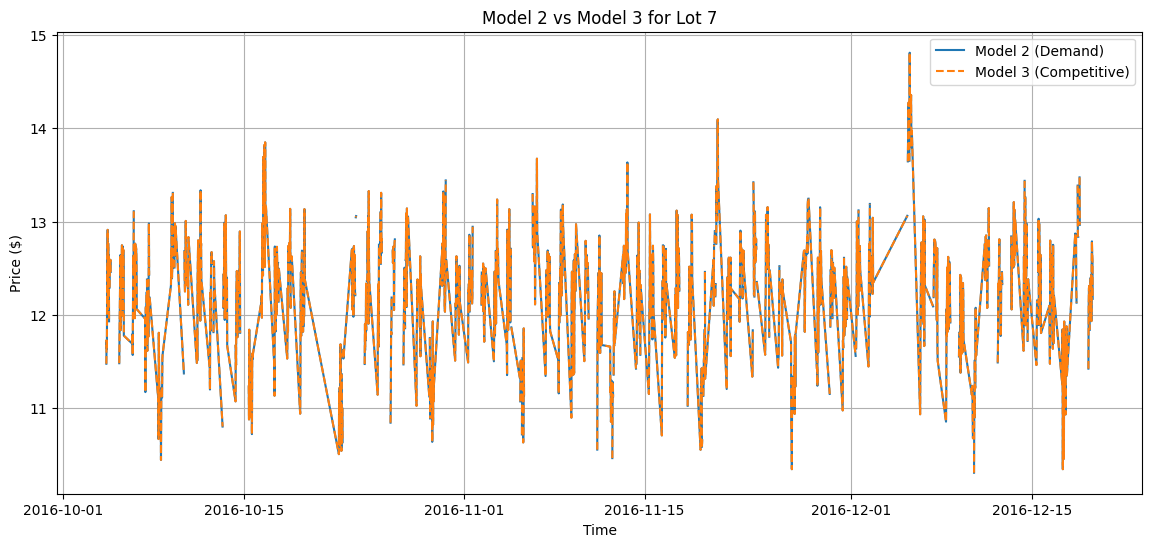

In [ ]:
plot_df = df[df['parking_lot_id'] == lot_id]  # same lot as before

plt.figure(figsize=(14, 6))
plt.plot(plot_df['timestamp'], plot_df['price_model2'], label='Model 2 (Demand)')
plt.plot(plot_df['timestamp'], plot_df['price_model3'], label='Model 3 (Competitive)', linestyle='--')
plt.title(f"Model 2 vs Model 3 for Lot {lot_id}")
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# pip install google-cloud-bigquery>=3.31.0

In [ ]:
!pip install pathway

In [ ]:
import pathway as pw
print(pw.__version__)  # Should show 0.24.1

0.24.1


In [ ]:
import pathway as pw
import pandas as pd
import numpy as np
from datetime import datetime


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)

In [ ]:
from pathway.internals.dtype import DATE_TIME_UTC

class ParkingInputSchema(pw.Schema):
    timestamp: DATE_TIME_UTC
    parking_lot_id: str
    occupancy: float
    capacity: float
    queue_length: float
    traffic_level: float
    special_day: int
    vehicle_weight: float



In [ ]:
df.head()

id systemcodenumber  capacity   latitude  longitude  occupancy vehicletype  \
0   0      BHMBCCMKT01       577  26.144536  91.736172         61         car   
1   1      BHMBCCMKT01       577  26.144536  91.736172         64         car   
2   2      BHMBCCMKT01       577  26.144536  91.736172         80         car   
3   3      BHMBCCMKT01       577  26.144536  91.736172        107         car   
4   4      BHMBCCMKT01       577  26.144536  91.736172        150        bike   

  trafficconditionnearby  queue_length  special_day  ... traffic_level  \
0                    low             1            0  ...             1   
1                    low             1            0  ...             1   
2                    low             2            0  ...             1   
3                    low             2            0  ...             1   
4                    low             2            0  ...             1   

  occupancy_rate  queue_norm traffic_norm  price  price_model1  raw_demand  \
0       0.105719    0.066667          0.0   10.0     10.211438    0.372860   
1       0.110919    0.066667          0.0   10.0     10.433276    0.375459   
2       0.138648    0.133333          0.0   10.0     10.710572    0.409324   
3       0.185442    0.133333          0.0   10.0     11.081456    0.432721   
4       0.259965    0.133333          0.0   10.0     11.601386    0.319983   

   norm_demand  price_model2  price_model3  
0     0.221834     11.109168     11.609168  
1     0.223817     11.119086     11.619086  
2     0.249657     11.248285     11.748285  
3     0.267510     11.337548     11.337548  
4     0.181487     10.907435     11.407435  

[5 rows x 25 columns]

In [ ]:
def compute_price(row):
    # Model 2 coefficients
    alpha = 0.5    # weight for occupancy
    beta = 0.3     # weight for queue length
    gamma = 0.2    # weight for traffic
    delta = 0.4    # weight for special day
    epsilon = 0.3  # weight for vehicle type
    lambda_ = 0.5  # price responsiveness to demand

    base_price = 10.0
    min_price = 5.0
    max_price = 20.0

    # Normalize some features (assuming max values ~10)
    occupancy_rate = row["occupancy"] / row["capacity"] if row["capacity"] > 0 else 0
    queue_norm = row["queue_length"] / 10
    traffic_norm = row["traffic_level"] / 10

    # Raw demand function
    demand = (
        alpha * occupancy_rate +
        beta * queue_norm -
        gamma * traffic_norm +
        delta * row["special_day"] +
        epsilon * row["vehicle_weight"]
    )

    # Normalize demand between 0 and 1
    norm_demand = max(0, min(demand / 3.0, 1.0))

    # Final price
    price = base_price * (1 + lambda_ * norm_demand)

    # Clamp to range [5, 20]
    return round(min(max(price, min_price), max_price), 2)


In [ ]:
# Test row example
sample = {
    'occupancy': 35,
    'capacity': 50,
    'queue_length': 2,
    'traffic_level': 5,
    'special_day': 1,
    'vehicle_weight': 1.0
}

compute_price(sample)


11.68

In [ ]:
@pw.udf
def price_udf(
    timestamp, parking_lot_id, occupancy, capacity,
    queue_length, traffic_level, special_day, vehicle_weight
):
    row = {
        'timestamp': timestamp,
        'parking_lot_id': parking_lot_id,
        'occupancy': occupancy,
        'capacity': capacity,
        'queue_length': queue_length,
        'traffic_level': traffic_level,
        'special_day': special_day,
        'vehicle_weight': vehicle_weight
    }
    return compute_price(row)


In [ ]:
def run_pathway_simulation(batch_df):

    t = pw.debug.table_from_pandas(batch_df, schema=ParkingInputSchema)

    # Apply your dynamic pricing UDF
    result = t.select(
        timestamp=t.timestamp,
        parking_lot_id=t.parking_lot_id,
        dynamic_price=pw.apply(
            price_udf,
            t.timestamp,
            t.parking_lot_id,
            t.occupancy,
            t.capacity,
            t.queue_length,
            t.traffic_level,
            t.special_day,
            t.vehicle_weight
        )
    )


    result.debug(name="streamed_prices")


    pw.run()


In [ ]:
def compute_price(Occupancy, Capacity, QueueLength, TrafficConditionNearby, IsSpecialDay, vehicle_weigth, d_min, d_max):

  alpha, beta, gamma, delta, epsilon, lambda_ = 0.5, 0.3, 0.2, 0.4, 0.3, 0.5

  base_price, min_price, max_price = 10.0, 5.0, 20.0

  occupancy_rate = occupancy/capacity

  # Note: Using fixed normalization factors as in the original notebook
  queue_norm = queue_length/10.0
  traffic_norm = trafficconditionnearby/10.0

  demand = (alpha*occupancy_rate + beta*queue_norm - gamma*traffic_norm + delta*special_day + epsilon * vehicle_weigth)

  # Note: Using fixed min/max for normalization as in the original notebook
  norm_demand = (demand - d_min)/(d_max - d_min)


  price = base_price * (1 + lambda_ * norm_demand)

  return round(min(max(price, min_price), max_price), 2)

In [ ]:
# @pw.udf
# def price_udf(Occupancy: int, Capacity: int, QueueLength: int, TrafficConditionNearby: int, IsSpecialDay: int, vehicle_weigth: float, d_min: float, d_max: float) -> float:
#     return compute_price(Occupancy, Capacity, QueueLength, TrafficConditionNearby, IsSpecialDay, vehicle_weigth, d_min, d_max)

In [ ]:
import pathway as pw

@pw.udf
def price_udf(
    occupancy: float,
    capacity: float,
    queue: float,
    traffic: float,
    special_day: int,
    weight: float,
    min_demand: float,
    max_demand: float
) -> float:
    # Compute demand
    demand = (occupancy / capacity) + queue + traffic + special_day

    # Normalize it
    if max_demand - min_demand == 0:
        normalized = 0.5
    else:
        normalized = (demand - min_demand) / (max_demand - min_demand)

    price = normalized * weight * 100

    return float(price)  # 🔥 VERY IMPORTANT!

In [ ]:
def simulate_realtime_stream(df, chunk_size=100):
    for i in range(0, len(df), chunk_size):
        yield df.iloc[i:i+chunk_size]


In [ ]:
print(df.columns.tolist())

['id', 'systemcodenumber', 'capacity', 'latitude', 'longitude', 'occupancy', 'vehicletype', 'trafficconditionnearby', 'queue_length', 'special_day', 'lastupdateddate', 'lastupdatedtime', 'parking_lot_id', 'timestamp', 'vehicle_weight', 'traffic_level', 'occupancy_rate', 'queue_norm', 'traffic_norm', 'price', 'price_model1', 'raw_demand', 'norm_demand', 'price_model2', 'price_model3']


In [ ]:
df

id systemcodenumber  capacity   latitude  longitude  occupancy  \
0          0      BHMBCCMKT01       577  26.144536  91.736172         61   
1          1      BHMBCCMKT01       577  26.144536  91.736172         64   
2          2      BHMBCCMKT01       577  26.144536  91.736172         80   
3          3      BHMBCCMKT01       577  26.144536  91.736172        107   
4          4      BHMBCCMKT01       577  26.144536  91.736172        150   
...      ...              ...       ...        ...        ...        ...   
17051  17051   Others-CCCPS98      3103  26.147500  91.727978       1840   
17052  17052   Others-CCCPS98      3103  26.147500  91.727978       1820   
17053  17053   Others-CCCPS98      3103  26.147500  91.727978       1781   
17054  17054   Others-CCCPS98      3103  26.147500  91.727978       1718   
17055  17055   Others-CCCPS98      3103  26.147500  91.727978       1671   

      vehicletype trafficconditionnearby  queue_length  special_day  ...  \
0             car                    low             1            0  ...   
1             car                    low             1            0  ...   
2             car                    low             2            0  ...   
3             car                    low             2            0  ...   
4            bike                    low             2            0  ...   
...           ...                    ...           ...          ...  ...   
17051         car                average             5            0  ...   
17052         car                    low             4            0  ...   
17053         car                    low             3            0  ...   
17054         car                    low             3            0  ...   
17055         car                    low             3            0  ...   

      traffic_level occupancy_rate  queue_norm traffic_norm  price  \
0                 1       0.105719    0.066667          0.0   10.0   
1                 1       0.110919    0.066667          0.0   10.0   
2                 1       0.138648    0.133333          0.0   10.0   
3                 1       0.185442    0.133333          0.0   10.0   
4                 1       0.259965    0.133333          0.0   10.0   
...             ...            ...         ...          ...    ...   
17051             2       0.592975    0.333333          0.5   10.0   
17052             1       0.586529    0.266667          0.0   10.0   
17053             1       0.573961    0.200000          0.0   10.0   
17054             1       0.553658    0.200000          0.0   10.0   
17055             1       0.538511    0.200000          0.0   10.0   

       price_model1  raw_demand  norm_demand  price_model2  price_model3  
0         10.211438    0.372860     0.221834     11.109168     11.609168  
1         10.433276    0.375459     0.223817     11.119086     11.619086  
2         10.710572    0.409324     0.249657     11.248285     11.748285  
3         11.081456    0.432721     0.267510     11.337548     11.337548  
4         11.601386    0.319983     0.181487     10.907435     11.407435  
...             ...         ...          ...           ...           ...  
17051     20.000000    0.596487     0.392468     11.962339     11.962339  
17052     20.000000    0.673265     0.451051     12.255256     12.255256  
17053     20.000000    0.646980     0.430996     12.154978     12.154978  
17054     20.000000    0.636829     0.423250     12.116248     12.116248  
17055     20.000000    0.629256     0.417471     12.087355     12.087355  

[18368 rows x 25 columns]

In [ ]:
df

id systemcodenumber  capacity   latitude  longitude  occupancy  \
0          0      BHMBCCMKT01       577  26.144536  91.736172         61   
1          1      BHMBCCMKT01       577  26.144536  91.736172         64   
2          2      BHMBCCMKT01       577  26.144536  91.736172         80   
3          3      BHMBCCMKT01       577  26.144536  91.736172        107   
4          4      BHMBCCMKT01       577  26.144536  91.736172        150   
...      ...              ...       ...        ...        ...        ...   
17051  17051   Others-CCCPS98      3103  26.147500  91.727978       1840   
17052  17052   Others-CCCPS98      3103  26.147500  91.727978       1820   
17053  17053   Others-CCCPS98      3103  26.147500  91.727978       1781   
17054  17054   Others-CCCPS98      3103  26.147500  91.727978       1718   
17055  17055   Others-CCCPS98      3103  26.147500  91.727978       1671   

      vehicletype trafficconditionnearby  queue_length  special_day  ...  \
0             car                    low             1            0  ...   
1             car                    low             1            0  ...   
2             car                    low             2            0  ...   
3             car                    low             2            0  ...   
4            bike                    low             2            0  ...   
...           ...                    ...           ...          ...  ...   
17051         car                average             5            0  ...   
17052         car                    low             4            0  ...   
17053         car                    low             3            0  ...   
17054         car                    low             3            0  ...   
17055         car                    low             3            0  ...   

      traffic_level occupancy_rate  queue_norm traffic_norm  price  \
0                 1       0.105719    0.066667          0.0   10.0   
1                 1       0.110919    0.066667          0.0   10.0   
2                 1       0.138648    0.133333          0.0   10.0   
3                 1       0.185442    0.133333          0.0   10.0   
4                 1       0.259965    0.133333          0.0   10.0   
...             ...            ...         ...          ...    ...   
17051             2       0.592975    0.333333          0.5   10.0   
17052             1       0.586529    0.266667          0.0   10.0   
17053             1       0.573961    0.200000          0.0   10.0   
17054             1       0.553658    0.200000          0.0   10.0   
17055             1       0.538511    0.200000          0.0   10.0   

       price_model1  raw_demand  norm_demand  price_model2  price_model3  
0         10.211438    0.372860     0.221834     11.109168     11.609168  
1         10.433276    0.375459     0.223817     11.119086     11.619086  
2         10.710572    0.409324     0.249657     11.248285     11.748285  
3         11.081456    0.432721     0.267510     11.337548     11.337548  
4         11.601386    0.319983     0.181487     10.907435     11.407435  
...             ...         ...          ...           ...           ...  
17051     20.000000    0.596487     0.392468     11.962339     11.962339  
17052     20.000000    0.673265     0.451051     12.255256     12.255256  
17053     20.000000    0.646980     0.430996     12.154978     12.154978  
17054     20.000000    0.636829     0.423250     12.116248     12.116248  
17055     20.000000    0.629256     0.417471     12.087355     12.087355  

[18368 rows x 25 columns]

In [ ]:
required_columns = [
    'timestamp',
    'parking_lot_id',
    'occupancy',
    'capacity',
    'queue_length',
    'traffic_level',
    'special_day',
    'vehicle_weight'
]

df_cleaned = df[required_columns].copy()


In [ ]:
for batch in simulate_realtime_stream(df_cleaned, chunk_size=100):
    run_pathway_simulation(batch)

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [ ]:
!pip install bokeh

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool
from bokeh.layouts import column
output_notebook()

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool
output_notebook()


In [ ]:
# Filter for one parking lot
selected_lot = df['parking_lot_id'].unique()[0]
plot_df = df[df['parking_lot_id'] == selected_lot].sort_values(by='timestamp')

# Convert time for tooltips
plot_df['time_str'] = plot_df['timestamp'].dt.strftime('%Y-%m-%d %H:%M')

# Create the figure with corrected args
p = figure(
    x_axis_type="datetime",
    title=f"Dynamic Pricing for Lot: {selected_lot}",
    width=800,
    height=400,
    tools="pan,wheel_zoom,box_zoom,reset,save"
)

# Plot lines for Model 2 and Model 3
p.line(plot_df['timestamp'], plot_df['price_model2'], line_width=2, color="green", legend_label="Model 2 Price")
p.line(plot_df['timestamp'], plot_df['price_model3'], line_width=2, color="blue", legend_label="Model 3 Price", line_dash="dashed")

# Add hover tooltip
hover = HoverTool(tooltips=[("Time", "@x{%F %T}"), ("Price", "@y")], formatters={'@x': 'datetime'})
p.add_tools(hover)

p.xaxis.axis_label = "Time"
p.yaxis.axis_label = "Price ($)"
p.legend.location = "top_left"

# Display the plot
show(p)


/usr/local/lib/python3.11/dist-packages/bokeh/util/serialization.py:242: UserWarning: no explicit representation of timezones available for np.datetime64
  return convert(array.astype("datetime64[us]"))


In [ ]:
for i in range(0, 14):
  selected_lot = df['parking_lot_id'].unique()[i]
  plot_df = df[df['parking_lot_id'] == selected_lot].sort_values(by='timestamp')

  # Convert time for tooltips
  plot_df['time_str'] = plot_df['timestamp'].dt.strftime('%Y-%m-%d %H:%M')

  # Create the figure with corrected args
  p = figure(
      x_axis_type="datetime",
      title=f"Dynamic Pricing for Lot: {selected_lot}",
      width=800,
      height=400,
      tools="pan,wheel_zoom,box_zoom,reset,save"
  )

  # Plot lines for Model 2 and Model 3
  p.line(plot_df['timestamp'], plot_df['price_model2'], line_width=2, color="green", legend_label="Model 2 Price")
  p.line(plot_df['timestamp'], plot_df['price_model3'], line_width=2, color="blue", legend_label="Model 3 Price", line_dash="dashed")

  # Add hover tooltip
  hover = HoverTool(tooltips=[("Time", "@x{%F %T}"), ("Price", "@y")], formatters={'@x': 'datetime'})
  p.add_tools(hover)

  p.xaxis.axis_label = "Time"
  p.yaxis.axis_label = "Price ($)"
  p.legend.location = "top_left"

  # Display the plot
  show(p)

/usr/local/lib/python3.11/dist-packages/bokeh/util/serialization.py:242: UserWarning: no explicit representation of timezones available for np.datetime64
  return convert(array.astype("datetime64[us]"))


/usr/local/lib/python3.11/dist-packages/bokeh/util/serialization.py:242: UserWarning: no explicit representation of timezones available for np.datetime64
  return convert(array.astype("datetime64[us]"))


/usr/local/lib/python3.11/dist-packages/bokeh/util/serialization.py:242: UserWarning: no explicit representation of timezones available for np.datetime64
  return convert(array.astype("datetime64[us]"))


/usr/local/lib/python3.11/dist-packages/bokeh/util/serialization.py:242: UserWarning: no explicit representation of timezones available for np.datetime64
  return convert(array.astype("datetime64[us]"))


/usr/local/lib/python3.11/dist-packages/bokeh/util/serialization.py:242: UserWarning: no explicit representation of timezones available for np.datetime64
  return convert(array.astype("datetime64[us]"))


/usr/local/lib/python3.11/dist-packages/bokeh/util/serialization.py:242: UserWarning: no explicit representation of timezones available for np.datetime64
  return convert(array.astype("datetime64[us]"))


/usr/local/lib/python3.11/dist-packages/bokeh/util/serialization.py:242: UserWarning: no explicit representation of timezones available for np.datetime64
  return convert(array.astype("datetime64[us]"))


/usr/local/lib/python3.11/dist-packages/bokeh/util/serialization.py:242: UserWarning: no explicit representation of timezones available for np.datetime64
  return convert(array.astype("datetime64[us]"))


/usr/local/lib/python3.11/dist-packages/bokeh/util/serialization.py:242: UserWarning: no explicit representation of timezones available for np.datetime64
  return convert(array.astype("datetime64[us]"))


/usr/local/lib/python3.11/dist-packages/bokeh/util/serialization.py:242: UserWarning: no explicit representation of timezones available for np.datetime64
  return convert(array.astype("datetime64[us]"))


/usr/local/lib/python3.11/dist-packages/bokeh/util/serialization.py:242: UserWarning: no explicit representation of timezones available for np.datetime64
  return convert(array.astype("datetime64[us]"))


/usr/local/lib/python3.11/dist-packages/bokeh/util/serialization.py:242: UserWarning: no explicit representation of timezones available for np.datetime64
  return convert(array.astype("datetime64[us]"))


/usr/local/lib/python3.11/dist-packages/bokeh/util/serialization.py:242: UserWarning: no explicit representation of timezones available for np.datetime64
  return convert(array.astype("datetime64[us]"))


/usr/local/lib/python3.11/dist-packages/bokeh/util/serialization.py:242: UserWarning: no explicit representation of timezones available for np.datetime64
  return convert(array.astype("datetime64[us]"))
